# Imports

In [1]:
# mamba activate <env>
import pandas as pd
import seaborn as sns
from owlready2 import get_ontology, Thing
import matplotlib.pyplot as plt
import copy
import numpy as np
from adjustText import adjust_text

# Get the data from the CoDex

In [3]:
source = "https://raw.githubusercontent.com/galaxyproject/galaxy_codex/refs/heads/main/communities/microgalaxy/resources/curated_tools.tsv"

df = pd.read_csv(source, sep="\t")
print(df.columns)
df.head()

Index(['Galaxy wrapper id', 'Galaxy tool ids', 'Description', 'bio.tool id',
       'bio.tool ids', 'biii', 'bio.tool name', 'bio.tool description',
       'EDAM operation', 'EDAM topic', 'Status', 'Source',
       'ToolShed categories', 'ToolShed id',
       'Date of first commit of the suite', 'Galaxy wrapper owner',
       'Galaxy wrapper source', 'Galaxy wrapper parsed folder',
       'Galaxy wrapper version', 'Conda id', 'Conda version',
       'EDAM operation (no superclasses)', 'EDAM topic (no superclasses)',
       'Available on UseGalaxy.org (Main)', 'Available on UseGalaxy.org.au',
       'Available on UseGalaxy.eu', 'Available on UseGalaxy.fr',
       'Tools available on UseGalaxy.org (Main)',
       'Tools available on UseGalaxy.org.au',
       'Tools available on UseGalaxy.eu', 'Tools available on UseGalaxy.fr',
       'Tools available on APOSTL', 'Tools available on ARGs-OAP',
       'Tools available on CIRM-CFBP', 'Tools available on ChemFlow',
       'Tools available on

,Galaxy wrapper id,Galaxy tool ids,Description,bio.tool id,bio.tool ids,biii,bio.tool name,bio.tool description,EDAM operation,EDAM topic,...,No. of tool users (all time) (usegalaxy.org.au),Tool usage (5 years) (usegalaxy.org.au),Tool usage (all time) (usegalaxy.org.au),No. of tool users (5 years) - all main servers,No. of tool users (all time) - all main servers,Tool usage (5 years) - all main servers,Tool usage (all time) - all main servers,Reviewed,To keep,Deprecated
0,PAMPA,"pampa_communitymetrics, pampa_presabs, pampa_g...",Tools to compute and analyse biodiversity metrics,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,849,38,38,1887,1887,184,184,True,True,False
1,TreeBest,treebest_best,TreeBeST best,treebest,treebest,NaN,TreeBeST,"TreeBeST, which stands for (gene) Tree Buildin...","Phylogenetic tree visualisation, Phylogenetic ...",Phylogenetics,...,0,0,0,1003,1022,48,52,True,True,False
2,abacas,abacas,Order and Orientate Contigs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,True,True,False
3,abricate,"abricate, abricate_list, abricate_summary",Mass screening of contigs for antiobiotic resi...,ABRicate,ABRicate,NaN,ABRicate,Mass screening of contigs for antimicrobial re...,Antimicrobial resistance prediction,"Genomics, Microbiology",...,503743,2012,2227,1436427,1446550,9024,9272,True,True,False
4,abritamr,abritamr,A pipeline for running AMRfinderPlus and colla...,abritamr,abritamr,NaN,abriTAMR,an AMR gene detection pipeline that runs AMRFi...,Antimicrobial resistance prediction,"Microbiology, Public health and epidemiology, ...",...,0,0,0,1139,1139,109,109,True,True,False


In [12]:
# Swap the values of the two columns sicne they are wrong in the CoDex ATM - remove when fixed !
df[['Tool usage (5 years) - all main servers', 'No. of tool users (5 years) - all main servers']] = \
df[['No. of tool users (5 years) - all main servers', 'Tool usage (5 years) - all main servers']]


# Plot new tools over time

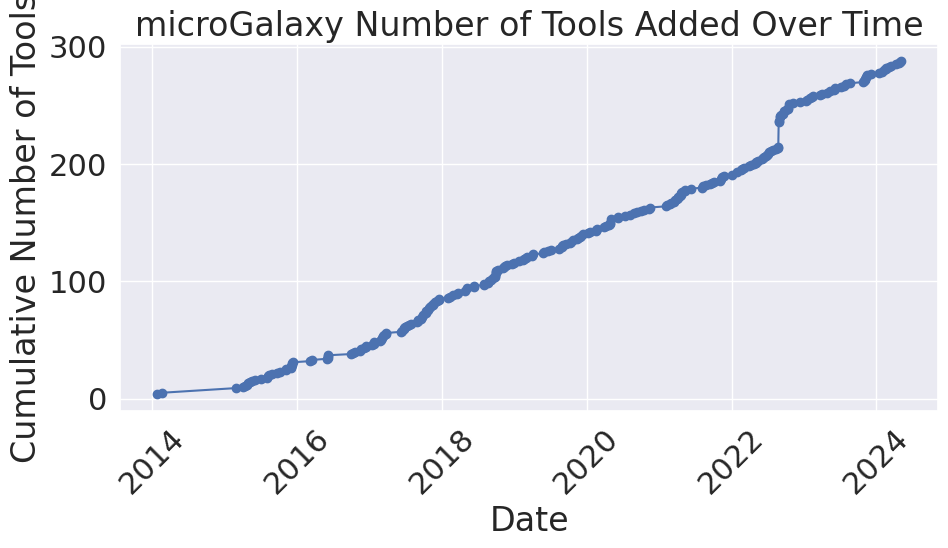

In [13]:
df['Date of first commit of the suite'] = pd.to_datetime(df['Date of first commit of the suite'])  # Ensure 'Date of first commit of the suite' is a datetime type

# Group by date and count tools added on each date
tools_per_day = df.groupby('Date of first commit of the suite').count()['Galaxy wrapper id']

# Get cumulative count
cumulative_tools = tools_per_day.cumsum()

# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(cumulative_tools.index, cumulative_tools.values, marker='o')
plt.title('microGalaxy Number of Tools Added Over Time')
plt.xlabel('Date')
plt.ylabel('Cumulative Number of Tools')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Create new rows, one row for each EDAM term per tool - to allow to visualize tools that are in multiple terms

In [14]:
inflated_tools = []

for idx, row in df.iterrows():
    terms = row["EDAM operation (no superclasses)"]
    row_d = row.to_dict()
    if isinstance(terms, str):
        vals = [t.strip() for t in terms.split(",")]
        for val in vals:
            row_c = copy.copy(row_d)
            row_c["EDAM operation single"] = val
            inflated_tools.append(row_c)
    else:
            row_c = copy.copy(row_d)
            row_c["EDAM operation single"] = "Undefined"
            inflated_tools.append(row_c)

df_inflated_operation = pd.DataFrame(inflated_tools)


In [6]:
df_inflated_operation.head()

,Galaxy wrapper id,Galaxy tool ids,Description,bio.tool id,bio.tool ids,biii,bio.tool name,bio.tool description,EDAM operation,EDAM topic,...,Tool usage (5 years) (usegalaxy.org.au),Tool usage (all time) (usegalaxy.org.au),No. of tool users (5 years) - all main servers,No. of tool users (all time) - all main servers,Tool usage (5 years) - all main servers,Tool usage (all time) - all main servers,Reviewed,Deprecated,To keep,EDAM operation single
0,PAMPA,"pampa_communitymetrics, pampa_presabs, pampa_g...",Tools to compute and analyse biodiversity metrics,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,38,38,1887,1887,184,184,True,False,True,Undefined
1,TreeBest,treebest_best,TreeBeST best,treebest,treebest,NaN,TreeBeST,"TreeBeST, which stands for (gene) Tree Buildin...","Phylogenetic tree visualisation, Phylogenetic ...",Phylogenetics,...,0,0,1003,1022,48,52,True,False,True,Phylogenetic tree visualisation
2,TreeBest,treebest_best,TreeBeST best,treebest,treebest,NaN,TreeBeST,"TreeBeST, which stands for (gene) Tree Buildin...","Phylogenetic tree visualisation, Phylogenetic ...",Phylogenetics,...,0,0,1003,1022,48,52,True,False,True,Phylogenetic inference (from molecular sequences)
3,abacas,abacas,Order and Orientate Contigs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,True,False,True,Undefined
4,abricate,"abricate, abricate_list, abricate_summary",Mass screening of contigs for antiobiotic resi...,ABRicate,ABRicate,NaN,ABRicate,Mass screening of contigs for antimicrobial re...,Antimicrobial resistance prediction,"Genomics, Microbiology",...,2012,2227,1436427,1446550,9024,9272,True,False,True,Antimicrobial resistance prediction


# Change term names for terms with low occurrences and tools without operations

In [15]:
# get terms with low occurrence
value_counts = df_inflated_operation["EDAM operation single"].value_counts()
values = value_counts[(value_counts >= 5)]

# reassign low number terms to "Other" 
df_inflated_mod_operation = df_inflated_operation.copy()
df_inflated_mod_operation.loc[~df_inflated_mod_operation["EDAM operation single"].isin(values.index), "EDAM operation single"] = "Other Operation"


# Plot EDAM operations

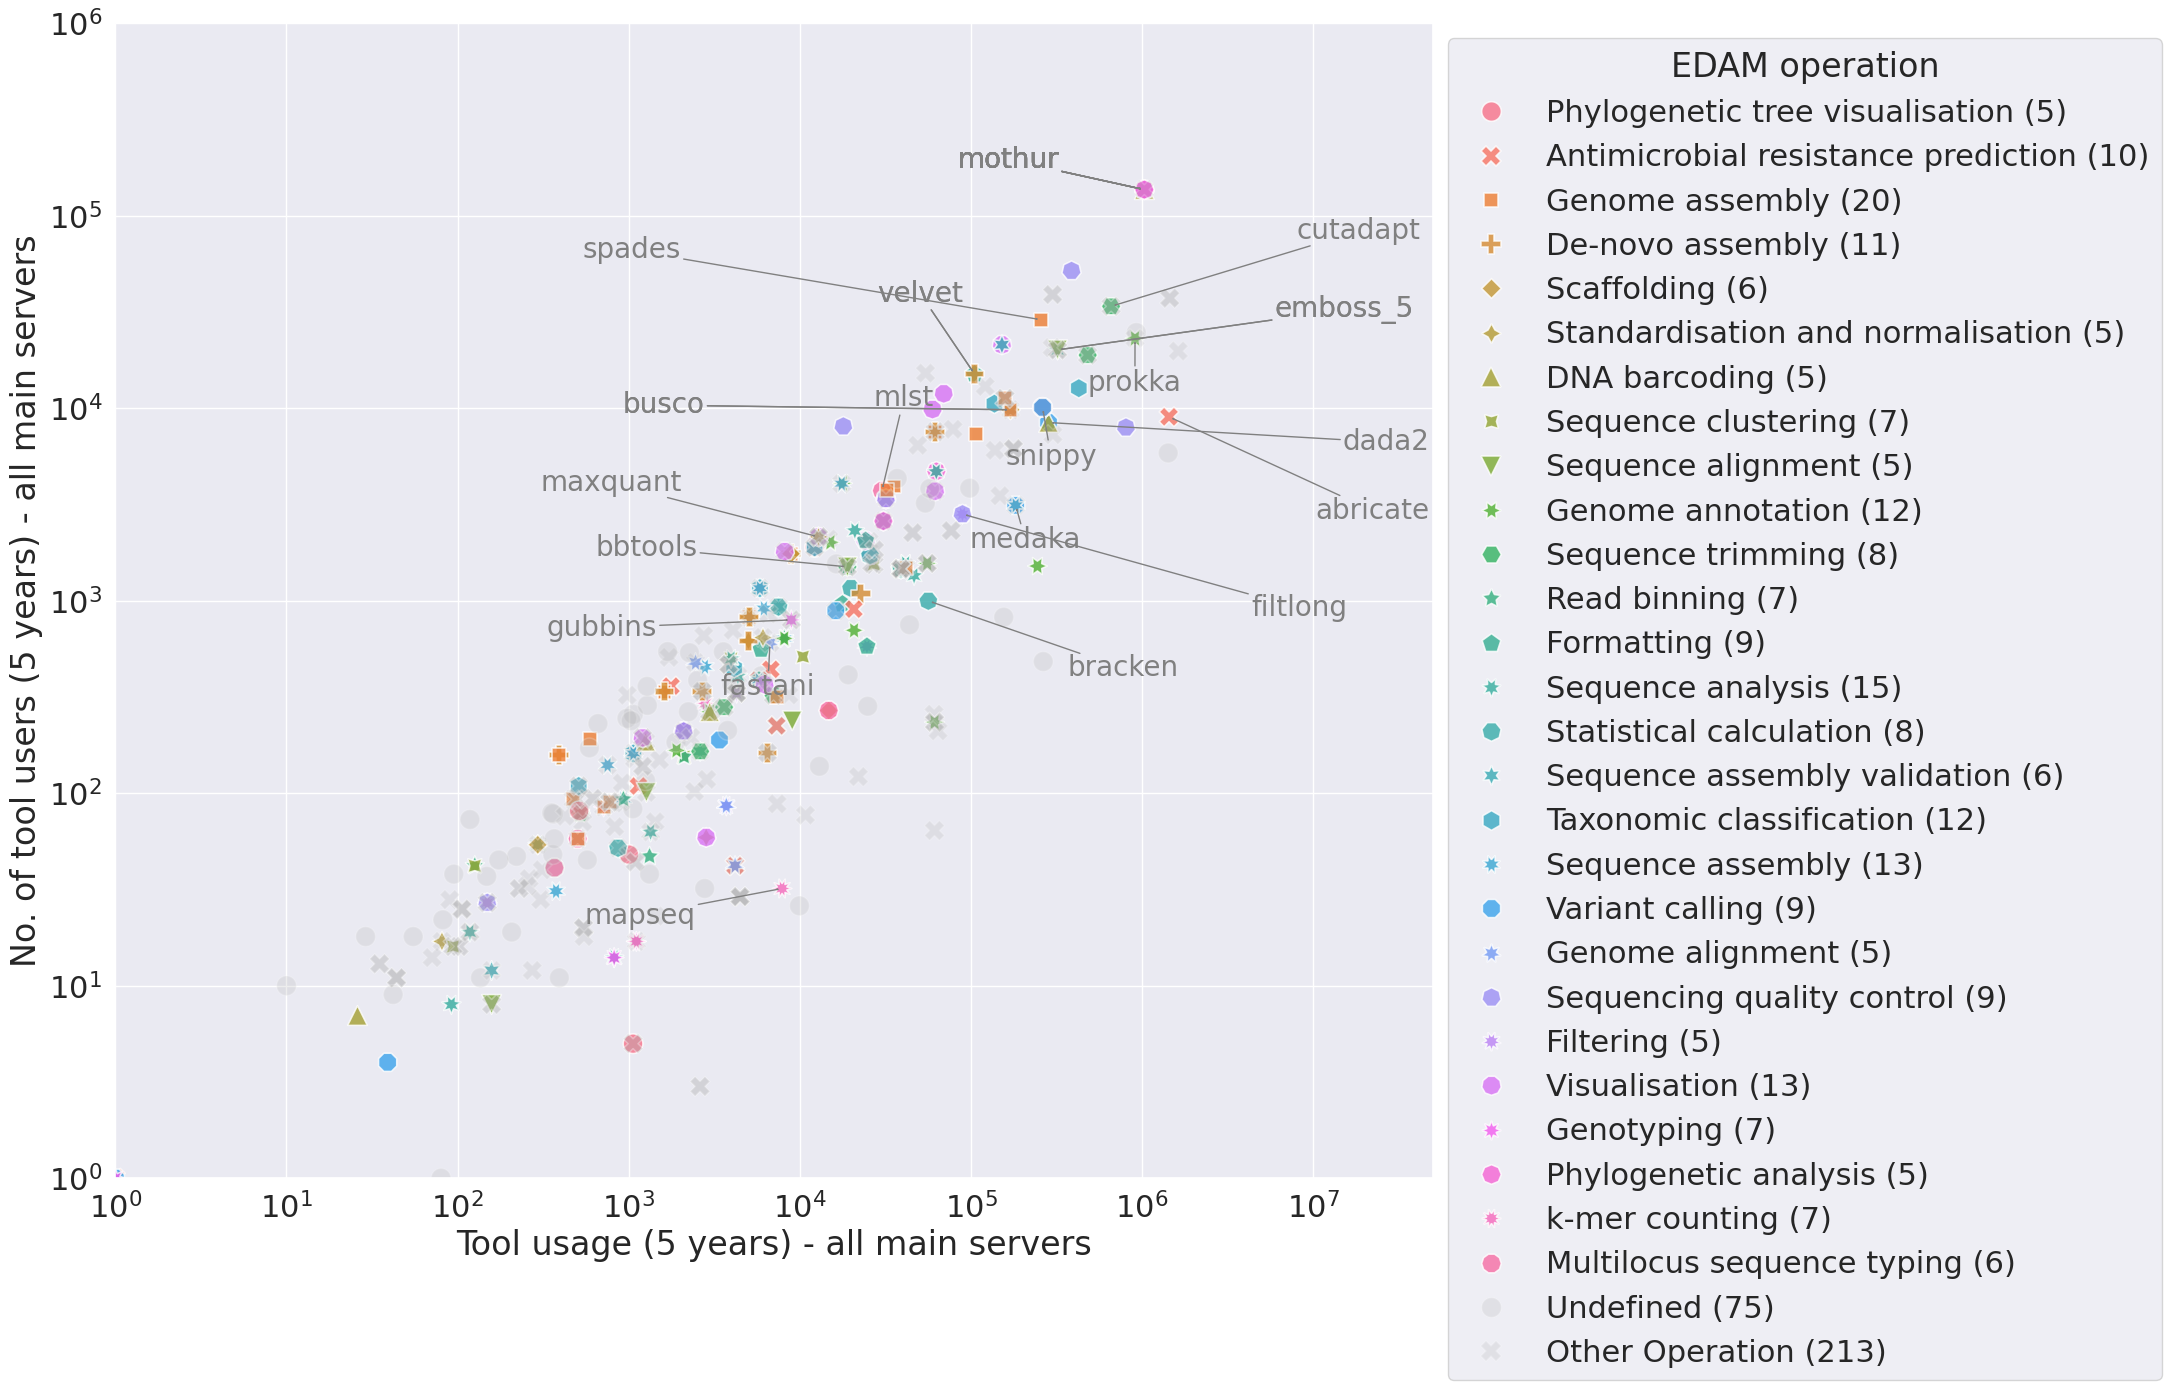

In [22]:
# global font size
sns.set()
sns.set(font_scale=2)  


# split in two df one of undef and other and rest
df_inflated_mod1_operation = df_inflated_mod_operation.loc[~df_inflated_mod_operation["EDAM operation single"].isin(["Undefined","Other Operation"])]
df_inflated_mod2_operation = df_inflated_mod_operation.loc[df_inflated_mod_operation["EDAM operation single"].isin(["Undefined","Other Operation"])]

# plt a figure
plt.figure(figsize=(17,15))

s = 200
# two axes in same plot to seperatly modify the dots
ax = sns.scatterplot(data=df_inflated_mod1_operation, 
                x='Tool usage (5 years) - all main servers', 
                y='No. of tool users (5 years) - all main servers', 
                hue="EDAM operation single",
                alpha=0.8,
                # markers=markers,
                style="EDAM operation single",
                # palette="deep"
                s=s
                )

ax2 = sns.scatterplot(data=df_inflated_mod2_operation, 
                x='Tool usage (5 years) - all main servers', 
                y='No. of tool users (5 years) - all main servers', 
                hue="EDAM operation single",
                alpha=0.2,
                # markers=markers,
                style="EDAM operation single",
                palette=['darkgrey','darkgrey'],
                s=s,
                ax=ax,
                )


# log scale
plt.xscale('log')
plt.yscale('log')

# increase limit to show all labels
ax.set(ylim=(1, 1000000), xlim=(1,50000000))

##########################################
# label highest used tools for each group
##########################################

# get highest tools for all groups:
max_idx = df_inflated_mod1_operation.groupby(["EDAM operation single"])['Tool usage (5 years) - all main servers'].transform("max") == df_inflated_mod1_operation['Tool usage (5 years) - all main servers']

df_inflated_mod_slice = df_inflated_mod1_operation[max_idx]

# i = 0
texts = []
for i, row in df_inflated_mod_slice.iterrows():
    x = row['Tool usage (5 years) - all main servers']
    y = row['No. of tool users (5 years) - all main servers']
    name = row['Galaxy wrapper id']
    # if not np.isnan(x) and not np.isnan(x):
    t = ax.text(x, y, name, ha='center', va='center', color='grey', size=20)
    texts.append(t)

# automatically adjust labels
adjust_text(texts, expand=(3, 2), arrowprops=dict(arrowstyle='->', color='grey'))


# more legend outside of plot
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

##############################
# Rename the legend to add the counts
##############################

# get value counts again
value_counts = df_inflated_mod_operation["EDAM operation single"].value_counts()

for i, k in value_counts.items():
    for text in ax2.get_legend().texts:
        if i == text.get_text():
            text.set_text(f'{i} ({k})')

ax2.get_legend().set_title("EDAM operation")

#title
# plt.title("microGalaxy Tool Catalogue")


#save
plt.savefig("../../results/jupyternotebook results/tools_operations_together.png", bbox_inches='tight')
plt.savefig("../../results/jupyternotebook results/tools_operations_together.svg", bbox_inches='tight')


# Inflate and add terms for Topics

In [12]:
# for topic

# create new rows, one row for each EDAM term per tool

inflated_tools = []

for idx, row in df.iterrows():
    terms = row["EDAM topic (no superclasses)"]
    row_d = row.to_dict()
    if isinstance(terms, str):
        vals = [t.strip() for t in terms.split(",")]
        for val in vals:
            row_c = copy.copy(row_d)
            row_c["EDAM topic single"] = val
            inflated_tools.append(row_c)
    else:
            row_c = copy.copy(row_d)
            row_c["EDAM topic single"] = "Undefined"
            inflated_tools.append(row_c)

df_inflated_topics = pd.DataFrame(inflated_tools)

# get terms with low occurrence
value_counts = df_inflated_topics["EDAM topic single"].value_counts()
values = value_counts[(value_counts >= 5)]

# reassign low number terms to "Other" 
df_inflated_mod_topic = df_inflated_topics.copy()
df_inflated_mod_topic.loc[~df_inflated_mod_topic["EDAM topic single"].isin(values.index), "EDAM topic single"] = "Other Topic"


In [13]:
df_inflated_topics.head()

,Galaxy wrapper id,Galaxy tool ids,Description,bio.tool id,bio.tool ids,biii,bio.tool name,bio.tool description,EDAM operation,EDAM topic,...,Tool usage (5 years) (usegalaxy.org.au),Tool usage (all time) (usegalaxy.org.au),No. of tool users (5 years) - all main servers,No. of tool users (all time) - all main servers,Tool usage (5 years) - all main servers,Tool usage (all time) - all main servers,Reviewed,Deprecated,To keep,EDAM topic single
0,PAMPA,"pampa_communitymetrics, pampa_presabs, pampa_g...",Tools to compute and analyse biodiversity metrics,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,38,38,1887,1887,184,184,True,False,True,Undefined
1,TreeBest,treebest_best,TreeBeST best,treebest,treebest,NaN,TreeBeST,"TreeBeST, which stands for (gene) Tree Buildin...","Phylogenetic tree visualisation, Phylogenetic ...",Phylogenetics,...,0,0,1003,1022,48,52,True,False,True,Phylogenetics
2,abacas,abacas,Order and Orientate Contigs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,True,False,True,Undefined
3,abricate,"abricate, abricate_list, abricate_summary",Mass screening of contigs for antiobiotic resi...,ABRicate,ABRicate,NaN,ABRicate,Mass screening of contigs for antimicrobial re...,Antimicrobial resistance prediction,"Genomics, Microbiology",...,2012,2227,1436427,1446550,9024,9272,True,False,True,Genomics
4,abricate,"abricate, abricate_list, abricate_summary",Mass screening of contigs for antiobiotic resi...,ABRicate,ABRicate,NaN,ABRicate,Mass screening of contigs for antimicrobial re...,Antimicrobial resistance prediction,"Genomics, Microbiology",...,2012,2227,1436427,1446550,9024,9272,True,False,True,Microbiology


# Plot Topics

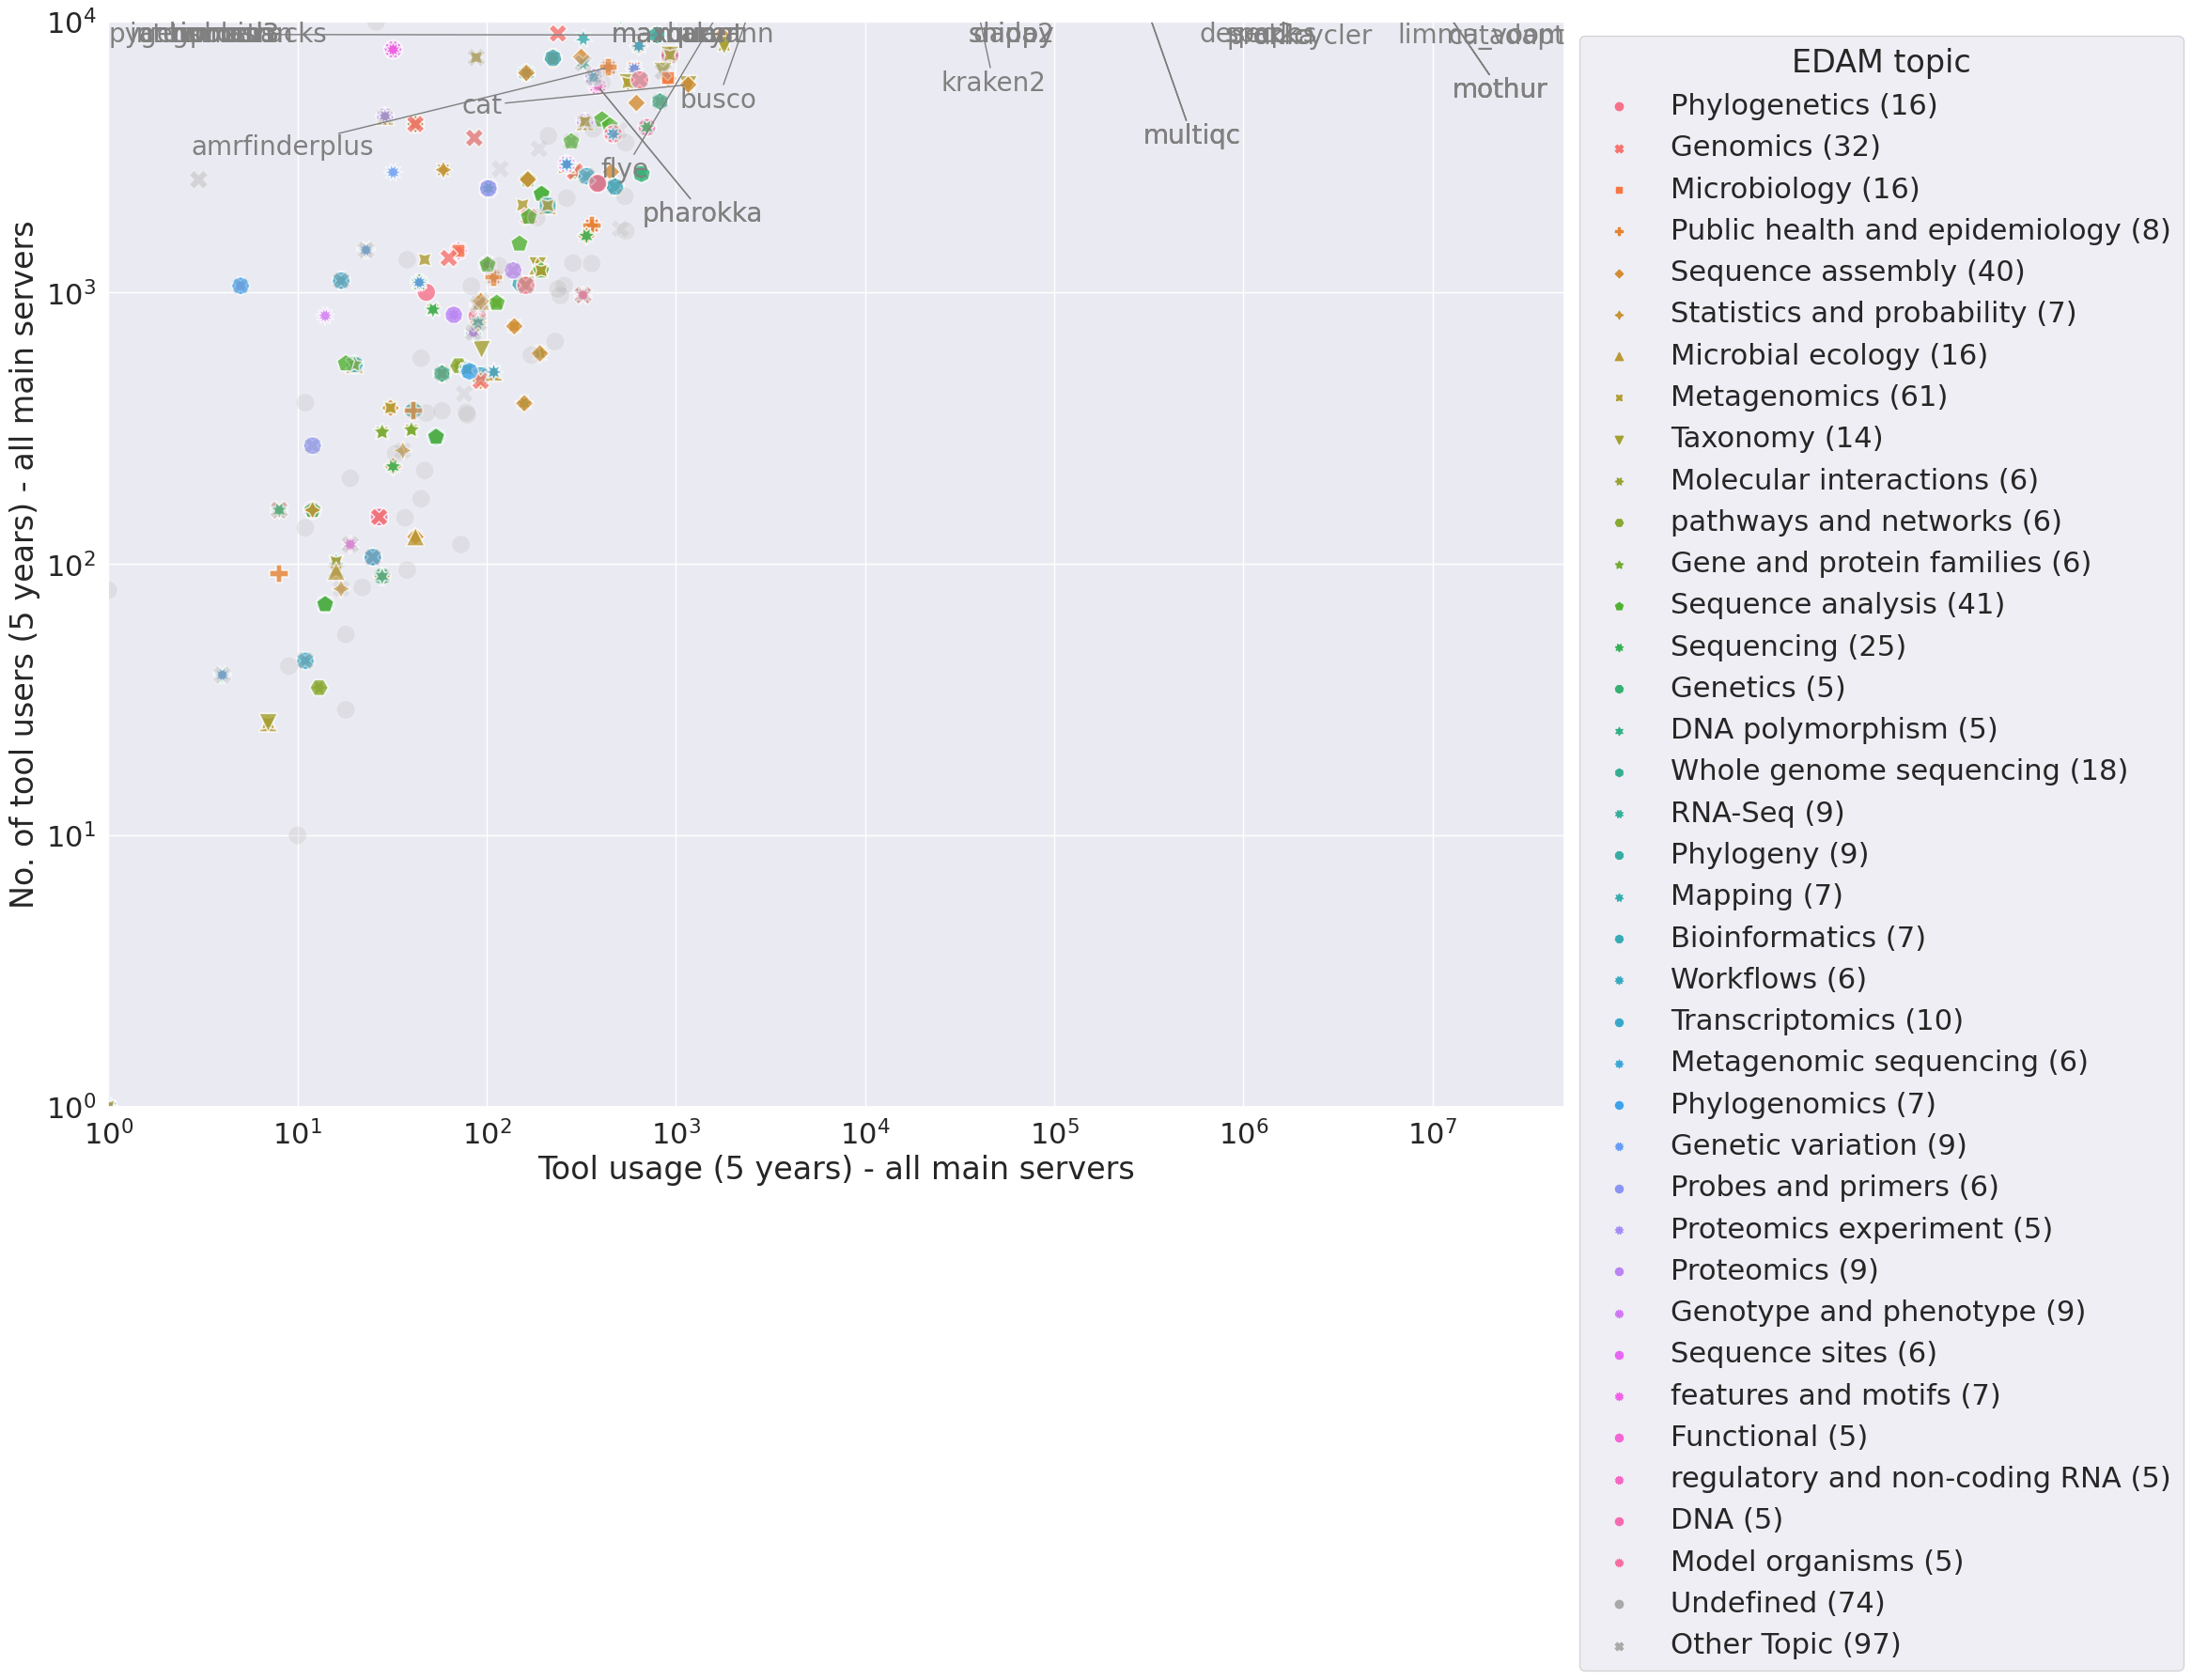

In [ ]:
# global font size
sns.set()
sns.set(font_scale=2)  


# split in two df one of undef and other and rest
df_inflated_mod1_topic = df_inflated_mod_topic.loc[~df_inflated_mod_topic["EDAM topic single"].isin(["Undefined","Other Topic"])]
df_inflated_mod2_topic = df_inflated_mod_topic.loc[df_inflated_mod_topic["EDAM topic single"].isin(["Undefined","Other Topic"])]

# plt a figure
plt.figure(figsize=(20,15))

s = 200
# two axes in same plot to seperatly modify the dots
ax = sns.scatterplot(data=df_inflated_mod1_topic, 
                x='Tool usage (5 years) - all main servers', 
                y='No. of tool users (5 years) - all main servers', 
                hue="EDAM topic single",
                alpha=0.8,
                # markers=markers,
                style="EDAM topic single",
                # palette="deep"
                s=s
                )

ax2 = sns.scatterplot(data=df_inflated_mod2_topic, 
                x='Tool usage (5 years) - all main servers', 
                y='No. of tool users (5 years) - all main servers', 
                hue="EDAM topic single",
                alpha=0.2,
                # markers=markers,
                style="EDAM topic single",
                palette=['darkgrey','darkgrey'],
                s=s,
                ax=ax,
                )


# log scale
plt.xscale('log')
plt.yscale('log')

# increase limit to show all labels
ax.set(ylim=(1, 10000), xlim=(1,50000000))

##########################################
# label highest used tools for each group
##########################################

# get highest tools for all groups:
max_idx = df_inflated_mod1_topic.groupby(["EDAM topic single"])['Tool usage (5 years) - all main servers'].transform("max") == df_inflated_mod1_topic['Tool usage (5 years) - all main servers']

df_inflated_mod_slice = df_inflated_mod1_topic[max_idx]

# i = 0
texts = []
for i, row in df_inflated_mod_slice.iterrows():
    x = row['Tool usage (5 years) - all main servers']
    y = row['No. of tool users (5 years) - all main servers']
    name = row['Galaxy wrapper id']
    # if not np.isnan(x) and not np.isnan(x):
    t = ax.text(x, y, name, ha='center', va='center', color='grey', size=20)
    texts.append(t)

# automatically adjust labels
adjust_text(texts, expand=(3, 2), arrowprops=dict(arrowstyle='->', color='grey'))

# more legend outside of plot
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

##############################
# Rename the legend to add the counts
##############################

# get value counts again
value_counts = df_inflated_mod_topic["EDAM topic single"].value_counts()

for i, k in value_counts.items():
    for text in ax2.get_legend().texts:
        if i == text.get_text():
            text.set_text(f'{i} ({k})')

ax2.get_legend().set_title("EDAM topic")

#title
# plt.title("microGalaxy Tool Catalogue")


#save
plt.savefig("../../results/jupyternotebook results/tools_topics_together.png", bbox_inches='tight')


# Calculating table statistics

In [7]:
# Get the total number of tools
total_tools = df.shape[0]

# Calculate total tool usage over the last 5 years, over all main servers
total_tool_usage = df['Tool usage (5 years) - all main servers'].sum()

# Calculate the average number of tool users over the last 5 years, over all main servers
average_tool_users = df['No. of tool users (5 years) - all main servers'].mean()

# Find the most used tool over the last 5 years, over all main servers
most_used_tool = df.loc[df['Tool usage (5 years) - all main servers'].idxmax()]

# Find the tool with the most used over the last 5 years, over all main servers
most_users_tool = df.loc[df['No. of tool users (5 years) - all main servers'].idxmax()]

total_tools, total_tool_usage, average_tool_users, most_used_tool, most_users_tool

(288,
 837061,
 64635.447916666664,
 Galaxy wrapper id                                                                      mothur
 Galaxy tool ids                             mothur_align_check, mothur_align_seqs, mothur_...
 Description                                                                   Mothur wrappers
 bio.tool id                                                                            mothur
 bio.tool ids                                                                           mothur
                                                                   ...                        
 Tool usage (5 years) - all main servers                                                136632
 Tool usage (all time) - all main servers                                               160093
 Reviewed                                                                                 True
 Deprecated                                                                              False
 To keep      

In [8]:
unique_tools = df["Galaxy wrapper id"].nunique()
unique_operations = df_inflated_operation["EDAM operation single"].nunique()
unique_topics = df_inflated_topics["EDAM topic single"].nunique()

# Tutorial titles by EDAM operation
titles_by_operation = df_inflated_mod_operation.groupby("EDAM operation single")["Galaxy wrapper id"].unique()

# Tutorial titles by EDAM topic
titles_by_topic = df_inflated_mod_topic.groupby("EDAM topic single")["Galaxy wrapper id"].unique()

# Print statistics
print(f"Total number of tools: {unique_tools}")
print(f"Total number of unique EDAM operations: {unique_operations}")
print(f"Total number of unique EDAM topics: {unique_topics}")

print("\nTools Wrapper by EDAM Operation:")
for operation, titles in titles_by_operation.items():
    print(f"\n{operation} ({len(titles)} Tool):")
    for title in titles:
        print(f" - {title}")

print("\nTools Wrapper by EDAM Topic:")
for topic, titles in titles_by_topic.items():
    print(f"\n{topic} ({len(titles)} Tool):")
    for title in titles:
        print(f" - {title}")

NameError: name 'df_inflated_topics' is not defined